In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
V = 39


## Считываем данные

In [3]:
data = pd.read_csv('data.csv',index_col='no')
delta_x1 = [V,-V,V,V,V,V,-V,V,V,-V]
delta_x2 = [V,-V,V,V,-V,V,-V,V,-V,-V]
data['x1'] = data['x1'] + delta_x1
data['x2'] += delta_x2

In [4]:
y = data['class']
X = data.drop('class',axis=1)


## Визуализируем данные без разделяющей прямой

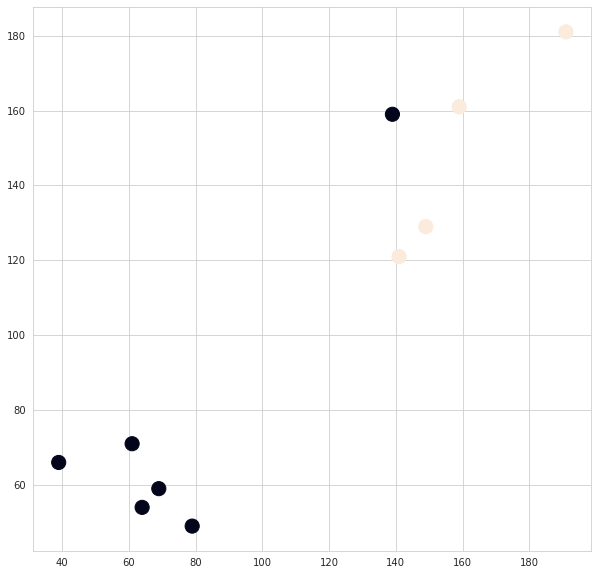

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(X['x1'],X['x2'],c=y,s=200)

In [6]:
p1 = 0.6 # вероятность первого класа
p2 = 0.4 # вероятность второго класса


$$\mu_1 = \frac{1}{6}\sum_{i=1}^{6} x_1 ^{(i)}$$
$$\mu_2 = \frac{1}{6}\sum_{i=1}^{6} x_2 ^{(i)}$$

$$\nu_1 = \frac{1}{4}\sum_{i=7}^{10} x_1 ^{(i)}$$
$$\nu_2 = \frac{1}{4}\sum_{i=7}^{10} x_2 ^{(i)}$$


In [7]:
mu_1 = data[0:6]['x1'].mean()
mu_2 = data[0:6]['x2'].mean()
mu = [mu_1,mu_2]

nu_1 = data[6:]['x1'].mean()
nu_2 = data[6:]['x2'].mean()
nu = [nu_1,nu_2]
X = X.values.T
mu,nu

([75.16666666666667, 76.33333333333333], [160.0, 148.0])

In [8]:
X

array([[ 79,  61,  69,  64,  39, 139, 191, 149, 159, 141],
       [ 49,  71,  59,  54,  66, 159, 181, 129, 161, 121]])

$$x_2 = \frac{\mu_1 - \nu_1}{\nu_2 - \mu_2}x_1 - \frac{\sigma^2}{\nu_2 - \mu_2}ln\left(\frac{p(2)}{p(1)} + \frac{\nu_1^2 +\nu_2^2 - \mu_1^2 - \mu_2^2}{2(\nu_2 - \mu_2)}\right) = a\cdot x_1 + b$$
$$
a = \frac{\mu_1 - \nu_1}{\nu_2 - \mu_2}
$$
$$
b = \frac{\sigma^2}{\nu_2 - \mu_2}\cdot ln\left(\frac{p(2)}{p(1)}\right) + \frac{\nu_1^2 +\nu_2^2 - \mu_1^2 - \mu_2^2}{2(\nu_2 - \mu_2)}
$$
$$
    \sigma^2 = \frac{1}{20}\sum_{j=1}^2 \left[ \sum_{i=1}^6 (x_j^{(i)} - \mu_j)^2 + \sum_{i=7}^{10} (x_j^{(i)} - \nu_j)^2\right]
$$

In [9]:
sigma2 = 1/20 * sum(
    [sum(
        [(X[j][i] - mu[j])**2 for i in range(6)]
         ) + 
            sum(
                [(X[j][i] - nu[j])**2 for i in range(6,10)]

            ) for j in range(2)])

In [10]:
a = (mu[0] - nu[0]) / (nu[1] - mu[1])
b = (sigma2 / (nu[1] - mu[1])) * math.log((p2/p1))+((nu[0]**2 + nu[1]**2 - mu[0]**2 - mu[1]**2) / (2*(nu[1]-mu[1])))

a,b

(-1.183720930232558, 246.2413488095079)

## Построим график разделяющей кривой и визуализируем данные на нём

In [11]:
f = lambda x: a * x + b

In [12]:
x1_grid = np.linspace(X[0].min() - 0.5, X[0].max() + 0.5, 1000)
line = f(x1_grid)

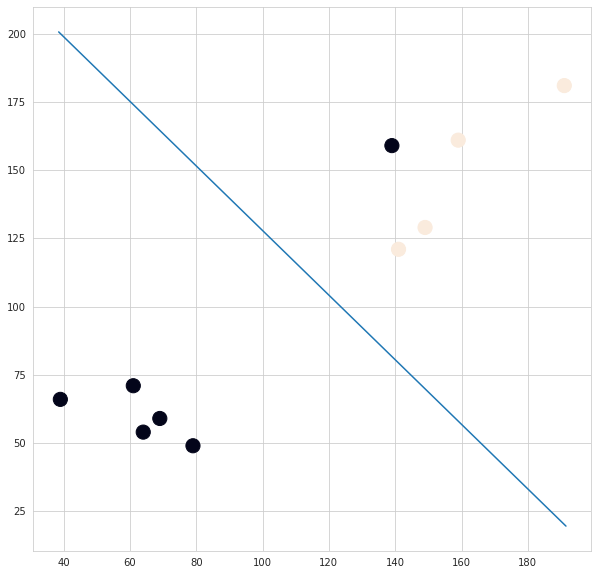

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(X[0],X[1],c=y,s=200)
plt.plot(x1_grid,line)